In [1]:
# 宣告大量陣列 and read file
base = 2

#format: tensor_(#spin)
for m in range (0, 5):
    M=32*pow(base,m)
    print('fp16'+'_'+str(M))
    locals()['fp16'+'_'+str(M)] = [] 

# format: gpu_(#spin)
for m in range (0, 5):
    M=32*pow(base, m)
    print('int'+'_'+str(M))
    locals()['int'+'_'+str(M)] = []


     

fp16_32
fp16_64
fp16_128
fp16_256
fp16_512
int_32
int_64
int_128
int_256
int_512


In [2]:
for n in range (0, 6):
    N=1024*pow(base, n)

    for m in range (0, 5):
        M=32*pow(base, m)
#         print("tc_"+str(M)+'_'+str(N)+".out")
        infile = open("./Results/tc_"+str(M)+'_'+str(N)+".out", 'r')
        for i in range (6): #redundant lune
            line = infile.readline()
        line = infile.readline()
#         print(line)
        words = line.split()
        #print(words[3])
        locals()['fp16'+'_'+str(M)].append(words[3])

for n in range (0, 6): 
    N=1024*pow(base, n)

    for m in range (0, 5):
        M=32*pow(base, m)
#         print("int_"+str(M)+'_'+str(N)+".out")
        infile = open("./Results/int_"+str(M)+'_'+str(N)+".out", 'r')
        for i in range (6): #redundant lune
            line = infile.readline()
        line = infile.readline()
        words = line.split()
        locals()['int'+'_'+str(M)].append(words[3])

for m in range (0, 5):
    M=32*pow(base,m)
    for i in range (len(locals()['fp16'+'_'+str(M)])):
        locals()['fp16'+'_'+str(M)][i] = float(locals()['fp16'+'_'+str(M)][i])
        locals()['fp16'+'_'+str(M)][i] = round(float(locals()['fp16'+'_'+str(M)][i])*10, 2)
        locals()['int'+'_'+str(M)][i] = float(locals()['int'+'_'+str(M)][i])
        locals()['int'+'_'+str(M)][i] = round(float(locals()['int'+'_'+str(M)][i])*10, 2)

print('fp16_32')
print(fp16_32)
print('fp16_64')
print(fp16_64)
print('fp16_128')
print(fp16_128)
print('fp16_256')
print(fp16_256)
print('fp16_512')
print(fp16_512)

print()
print('int_32')
print(int_32)
print('int_64')
print(int_64)
print('int_128')
print(int_128)
print('int_256')
print(int_256)
print('int_512')
print(int_512)


fp16_32
[0.22, 0.59, 1.26, 2.72, 6.26, 15.82]
fp16_64
[0.2, 0.46, 1.01, 2.24, 6.47, 17.59]
fp16_128
[0.24, 0.55, 1.19, 3.34, 9.75, 31.95]
fp16_256
[0.43, 0.94, 2.32, 6.07, 18.27, 57.33]
fp16_512
[0.68, 1.55, 3.73, 10.39, 33.5, 96.74]

int_32
[0.25, 0.63, 1.41, 3.25, 7.49, 15.74]
int_64
[0.23, 0.49, 1.14, 2.59, 5.15, 13.01]
int_128
[0.33, 0.67, 1.44, 2.75, 6.72, 17.47]
int_256
[0.57, 1.19, 2.3, 5.16, 12.37, 32.74]
int_512
[1.02, 1.98, 4.17, 9.38, 22.8, 61.35]


## 畫圖

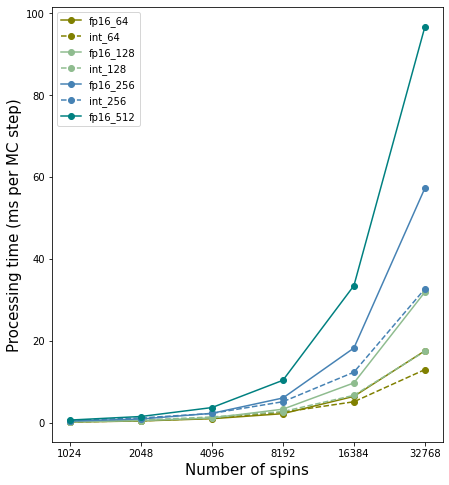

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(7, 8))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 10 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
x = [1024, 2048, 4096, 8192, 16384, 32768]
values = range(len(x))
    
# ax.plot(values, fp16_32, "o-", color = 'steelblue', label="fp16_32")
# ax.plot(values, int_32, "o--", color = 'steelblue', label="int_32")
ax.plot(values, fp16_64, "o-", color = 'olive', label="fp16_64")
ax.plot(values, int_64, "o--", color = 'olive', label="int_64")
ax.plot(values, fp16_128, "o-", color = 'darkseagreen', label="fp16_128")
ax.plot(values, int_128, "o--", color = 'darkseagreen', label="int_128")
ax.plot(values, fp16_256, "o-", color = 'steelblue', label="fp16_256")
ax.plot(values, int_256, "o--", color = 'steelblue', label="int_256")
ax.plot(values, fp16_512, "o-", color = 'teal', label="fp16_512")
#ax.plot(values, int_512, "o--", color = 'teal', label="int_512")

#ax.set_yscale('log')
plt.xticks(values,x)
ax.set_xlabel(r'Number of spins', fontsize = 15)
ax.set_ylabel('Processing time (ms per MC step)', fontsize = 15)
plt.legend()
plt.show()

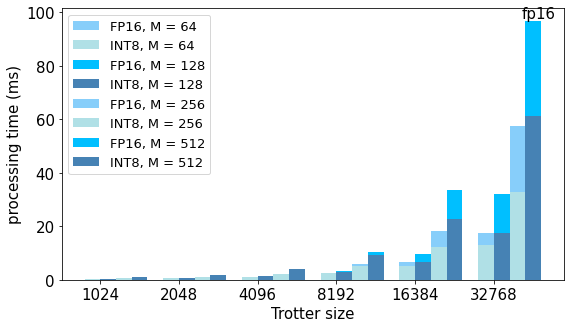

In [60]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

fig, ax = plt.subplots(figsize=(9, 5))
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 15
rcParams['legend.fontsize'] = 13 # 圖標的大小
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

XX = [1024, 2048, 4096, 8192, 16384, 32768]
x = np.arange(len(XX))
width = 0.2
  # mediumturquoise lightseagreen powderblue (v)  steelblue lightskyblue cadetblue

    
plt.bar(x, fp16_64, width, color='lightskyblue', label='FP16, M = 64')
plt.bar(x, int_64, width, color='powderblue', label='INT8, M = 64')
plt.bar(x+width*1, fp16_128, width, color='deepskyblue', label='FP16, M = 128')
plt.bar(x+width*1, int_128, width, color='steelblue', label='INT8, M = 128')
plt.bar(x + width*2, fp16_256, width, color='lightskyblue', label='FP16, M = 256')
plt.bar(x + width*2, int_256, width, color='powderblue', label='INT8, M = 256')
plt.bar(x + width*3, fp16_512, width, color='deepskyblue', label='FP16, M = 512')
plt.bar(x + width*3, int_512, width, color='steelblue', label='INT8, M = 512')
# darkolivegreen  olivedrab   yellowgreen
plt.xticks(x + width / 2, XX)
plt.xlabel('Trotter size', fontsize = 15)
plt.ylabel('processing time (ms)',  fontsize = 15)
#ax.set_yscale('log', base=2)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.legend()

string = 'fp16'
plt.text(x[len(x)-1] + width*3-0.15, fp16_512[len(fp16_512)-1]+1, string)

plt.show()
# lightskyblue  powderblue, deepskyblue  steelblue,  darkseagreen  teal,  mediumseagreen   mediumaquamarine

## 算倍率

In [9]:
print('tensor_4096')
print(tensor_4096)
print('tensor_8192')
print(tensor_8192)
print('tensor_16384')
print(tensor_16384)
print('tensor_32768')
print(tensor_32768)

print('gpu_4096')
print(gpu_4096)
print('gpu_8192')
print(gpu_8192)
print('gpu_16384')
print(gpu_16384)
print('gpu_32768')
print(gpu_32768)

print('tohoku_FPGA_4096')
print(tohoku_FPGA_4096)
print('tohoku_FPGA_8192')
print(tohoku_FPGA_8192)
print('tohoku_FPGA_16384')
print(tohoku_FPGA_16384)
print('tohoku_FPGA_32768')
print(tohoku_FPGA_32768)

print('tohoku_GPU_4096')
print(tohoku_GPU_4096)
print('tohoku_GPU_8192')
print(tohoku_GPU_8192)
print('tohoku_GPU_16384')
print(tohoku_GPU_16384)
print('tohoku_GPU_32768')
print(tohoku_GPU_32768)

tensor_4096
[1.42, 1.44, 1.38, 1.24, 1.01, 1.17, 2.33, 3.71]
tensor_8192
[3.11, 3.05, 2.98, 2.57, 1.97, 2.53, 5.0, 8.89]
tensor_16384
[6.58, 6.77, 6.81, 6.37, 5.65, 7.4, 14.19, 25.18]
tensor_32768
[16.9, 16.75, 16.68, 15.27, 15.61, 22.97, 43.46, 77.04]
gpu_4096
[1.43, 1.42, 1.38, 1.27, 1.01, 1.18, 2.35, 3.74]
gpu_8192
[3.06, 3.02, 3.15, 2.71, 2.23, 3.34, 6.08, 10.44]
gpu_16384
[6.57, 6.75, 6.77, 6.29, 6.49, 9.79, 18.36, 33.67]
gpu_32768
[15.4, 19.13, 16.34, 15.85, 17.66, 31.98, 57.41, 96.78]
tohoku_FPGA_4096
[4.61, 4.71, 5.11, 5.81, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_8192
[17.45, 17.79, 19.87, 20.73, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_16384
[65.77, 68.97, 70.33, 0.0, 0.0, 0.0, 0.0, 0.0]
tohoku_FPGA_32768
[264.93, 270.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tohoku_GPU_4096
[12, 13, 16, 22, 32, 66, 230, 1000]
tohoku_GPU_8192
[35, 43, 48, 59, 70, 128, 256, 1020]
tohoku_GPU_16384
[140.4, 156.4, 166.4, 217.6, 230, 512, 1024, 2048]
tohoku_GPU_32768
[1024, 1024, 1030, 1050, 1331.2, 2457.6, 5324.8, 9830.4

In [32]:
print(int_512[len(int_512)-1])

61.35
